<div style="border-blue: 15px; border-style: solid; border-color: blue;background-color: lightgreen; padding: 15pt">

 # Algoritmo De Grover 
 
  <b>*Alison  Geraldine  Valderrama  Munar*<b>
     </div>

 > El algoritmo de Grover es un algoritmo cuántico para la búsqueda en una secuencia no ordenada de datos con N componentes en un tiempo O (N^{1/2), es un algoritmo de carácter probabilístico, por lo que produce la respuesta correcta con una determinada probabilidad de error, que, no obstante, puede obtenerse tan baja como se desee por medio de iteraciones.

<b>El propósito del algoritmo es la búsqueda en una secuencia, se podría describir de una manera más adecuada como la "inversión de una función". 
    
 Así, si tenemos la función y=f (x), que puede ser evaluada en un computador cuántico, este algoritmo nos permite calcular el valor de x cuando se nos da como entrada el valor de y. Invertir una función puede relacionarse con la búsqueda en una secuencia, si consideramos que la misma es una función que produce el valor de y como la posición ocupada por el valor x en dicha secuencia.
    
<b>El algoritmo de Grover también se puede utilizar para el cálculo de la media y la mediana de un conjunto de números, y para resolver otros problemas de naturaleza análoga. También se puede utilizar para resolver algunos problemas de naturaleza NP-completa, por medio de inspecciones exhaustivas en un espacio de posibles soluciones.

<p style="background-color:lightcyan; color:blue; padding:20px"> Empezaremos con una funciones $f:\{0, 1\}^4 \longrightarrow \{0, 1\}$ para ver la cadena o las cadenas ganadora al realizar 1 iteracion y el numero optimo de iteraciones. </p>

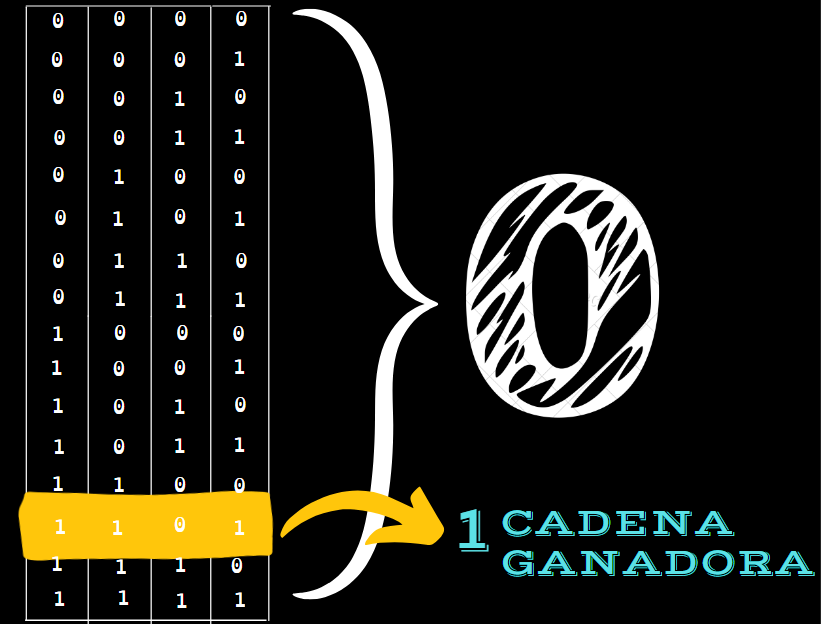

In [2]:
from qiskit import QuantumCircuit

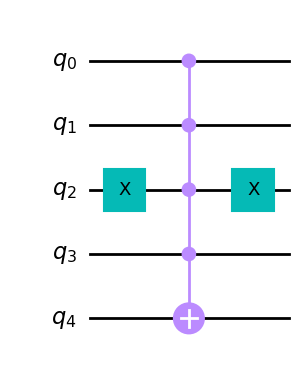

In [309]:
circuito = QuantumCircuit(5)
circuito.x(2)
circuito.mct([0,1,2,3],4)
circuito.x(2)
circuito.draw(output='mpl')
    


In [310]:
from qiskit import QuantumCircuit, transpile 

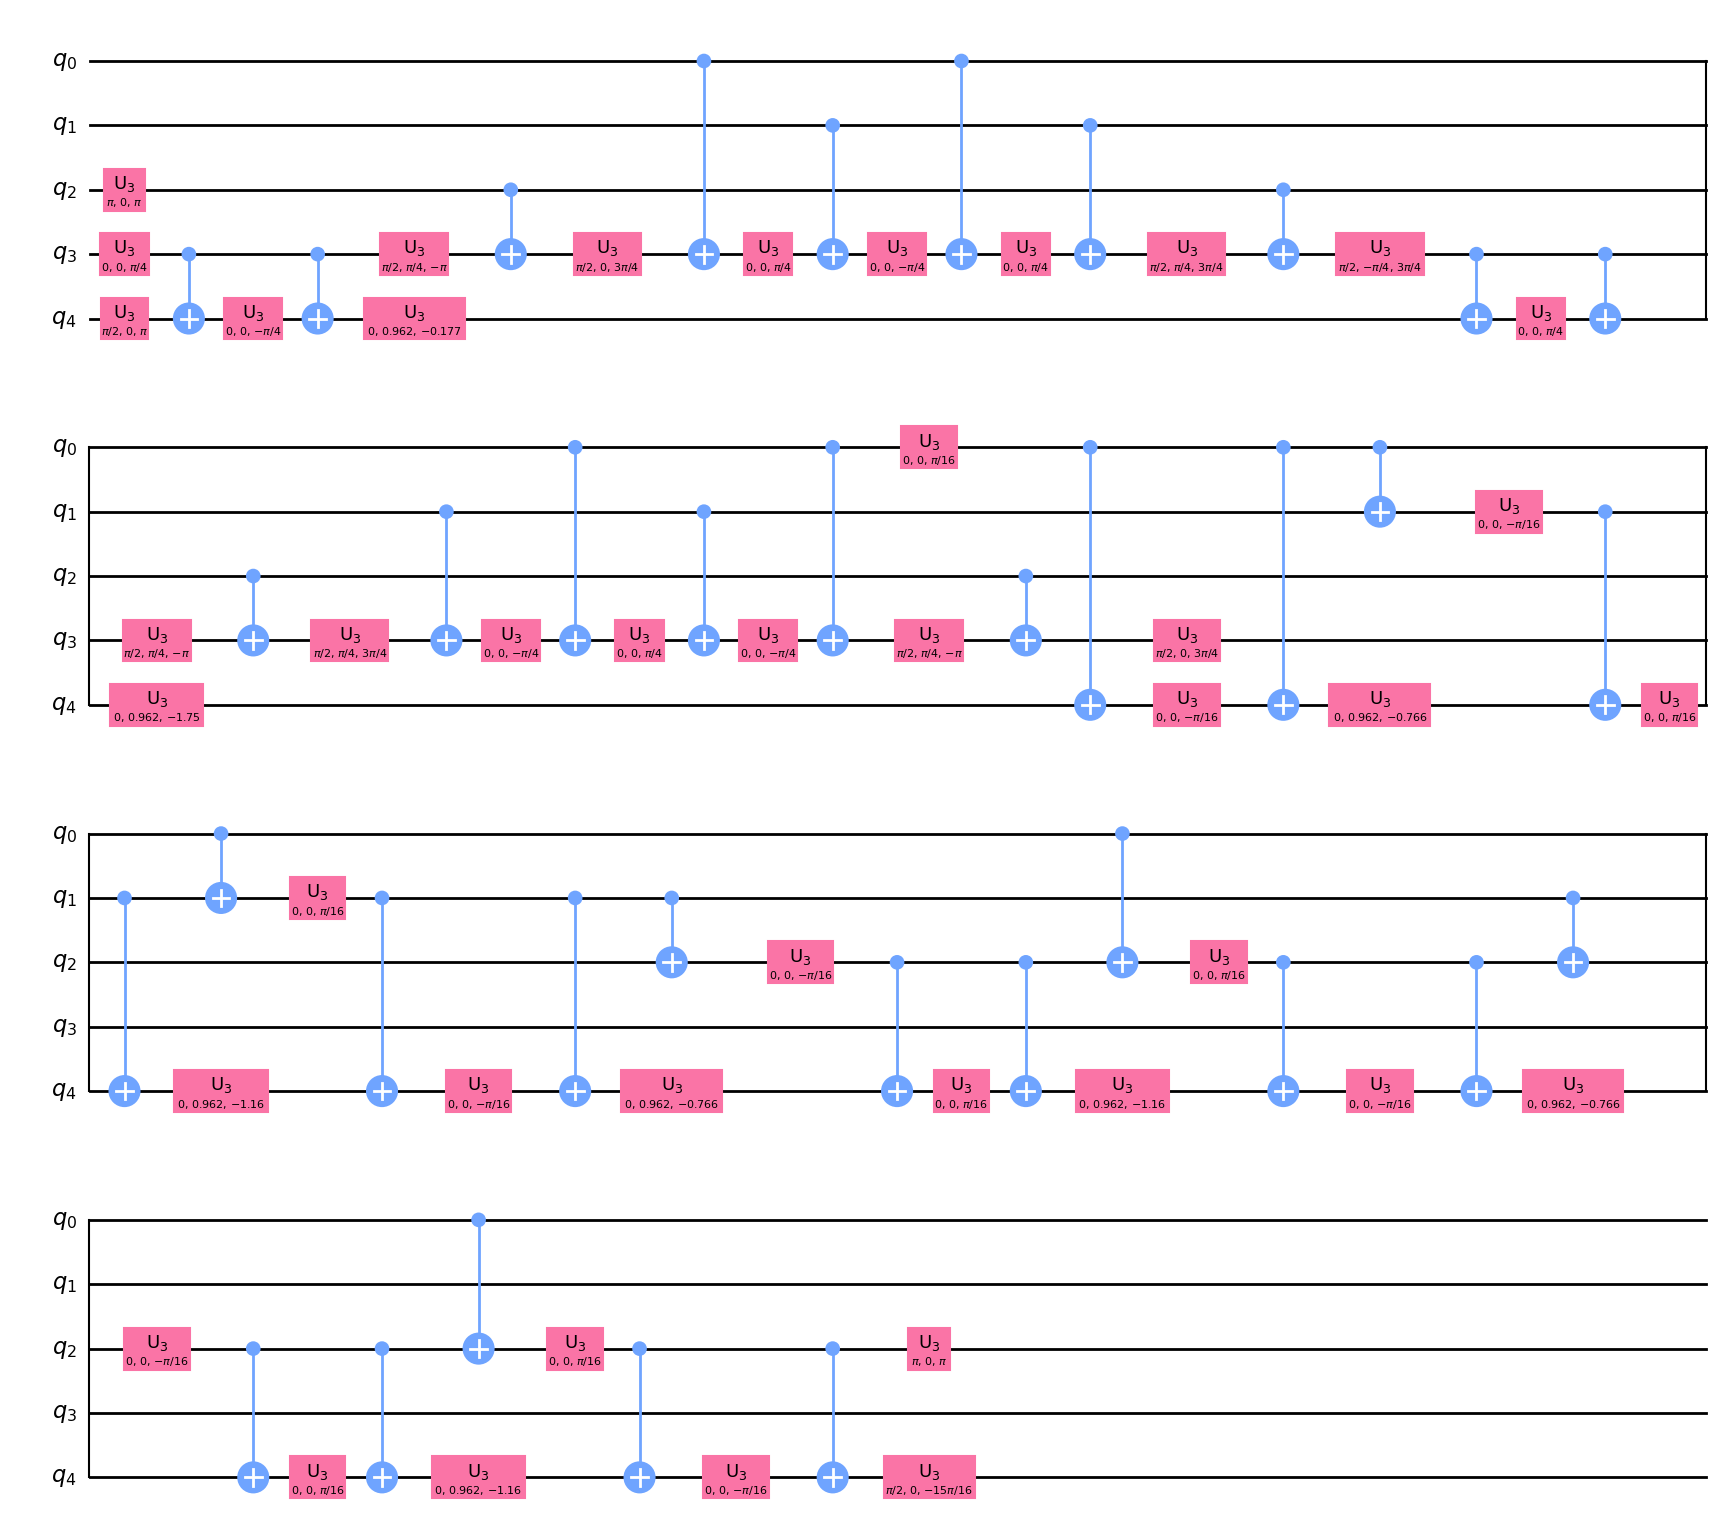

In [311]:
result= transpile(circuito, basis_gates=['u3','cx'])
result.draw(output='mpl')

In [312]:
result.count_ops()

OrderedDict([('u3', 43), ('cx', 36)])

In [313]:
costo = result.count_ops()['u3'] + 10*result.count_ops()['cx']

In [314]:
print(costo)

403


In [315]:
orac = circuito.to_gate()
orac.name = ' AlGrover! '

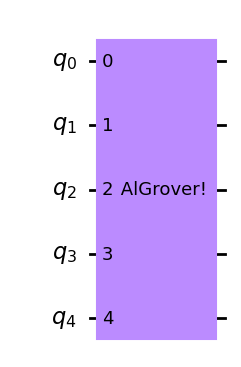

In [316]:
circuito = QuantumCircuit(5)
circuito.append(orac, [0, 1, 2, 3, 4])
circuito.draw(output='mpl')

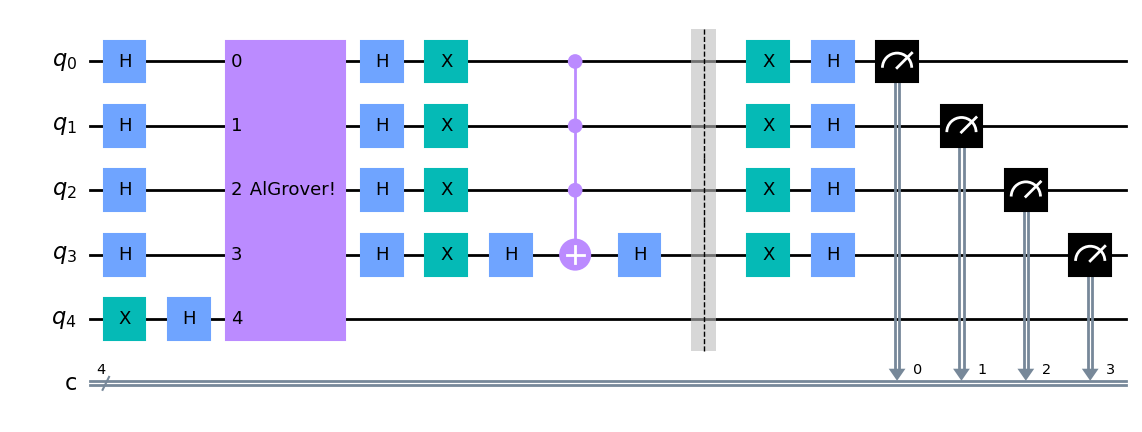

In [317]:
c = QuantumCircuit(5, 4)
c.x(4)
c.h(range(5))
c.append(orac, range(5))
c.h(range(4))
c.x([0, 1, 2, 3])
c.h(3)
c.mct([0,1,2],3)
c.h(3)
c.barrier()
c.x([0, 1, 2, 3])
c.h(range(4))
c.measure(range(4), range(4))
c.draw(output='mpl')

In [318]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [319]:
simulador = Aer.get_backend('qasm_simulator')

In [320]:
ejecucion = execute(c, backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

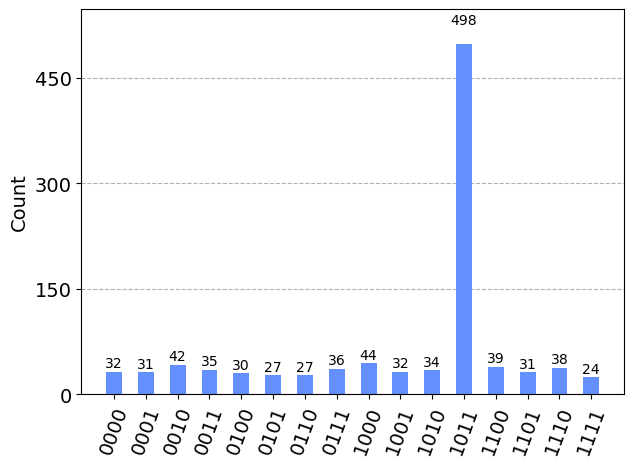

In [321]:
plot_histogram(conteos)

<p style="background-color:lightgreen; color:greenblack; padding:20px"> Podemos ver que al hacer una iteracion en el  oraculo de grover nos da la cadena ganadora que habiamos definido con una probalidad de 470 osea la cadena ganadora <span style="font-size:30px"> 🏆</span> </p>

<p style="background-color:lightcyan; color:blue; padding:20px"> Ahora probaremos la probabilidad con 2 iteraciones  </p> 

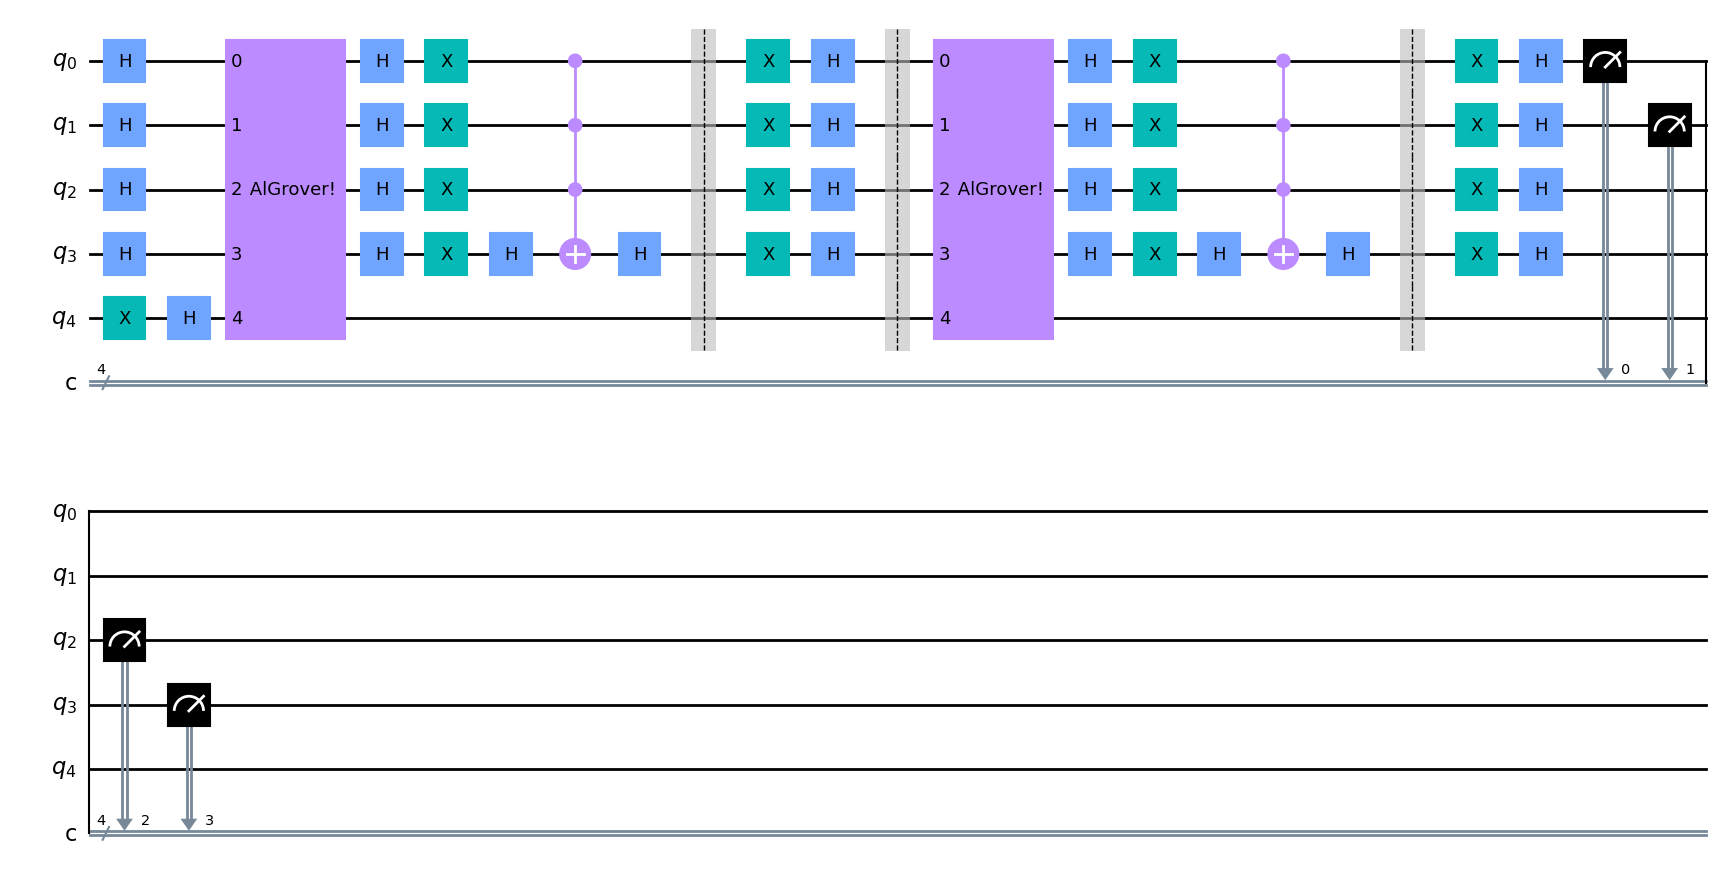

In [322]:
c1 = QuantumCircuit(5, 4)
c1.x(4)
c1.h(range(5))
c1.append(orac, range(5))
c1.h(range(4))
c1.x([0, 1, 2, 3])
c1.h(3)
c1.mct([0,1,2],3)
c1.h(3)
c1.barrier()
c1.x([0, 1, 2, 3])
c1.h(range(4))
c1.barrier()
c1.append(orac, range(5))
c1.h(range(4))
c1.x([0, 1, 2, 3])
c1.h(3)
c1.mct([0,1,2],3)
c1.h(3)
c1.barrier()
c1.x([0, 1, 2, 3])
c1.h(range(4))
c1.measure(range(4), range(4))
c1.draw(output='mpl')

In [24]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [25]:
simulador = Aer.get_backend('qasm_simulator')

In [325]:
ejecucion = execute(c1, backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

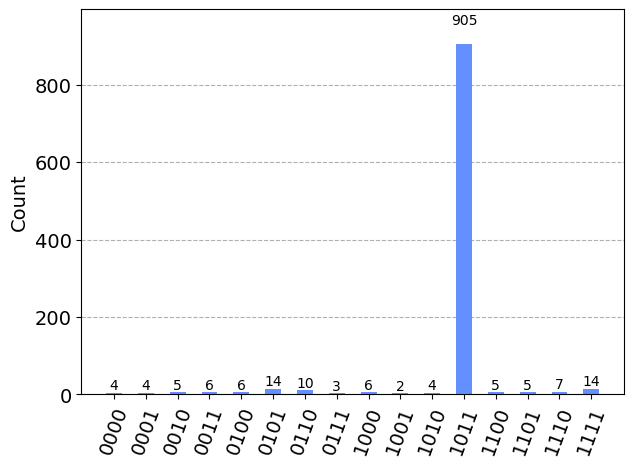

In [326]:
plot_histogram(conteos)

<p style="background-color:black; color:white; padding:28px"> Podemos mirar que aún con dos iteraciones obtenemos la cadena ganadora $|1101\rangle$<span style="font-size:30px"> 🏆</span> </p> 

<p style="background-color:lightcyan; color:greenblack; padding:10px"> Ahora probaremos la probabilidad con 3 iteraciones  </p> 

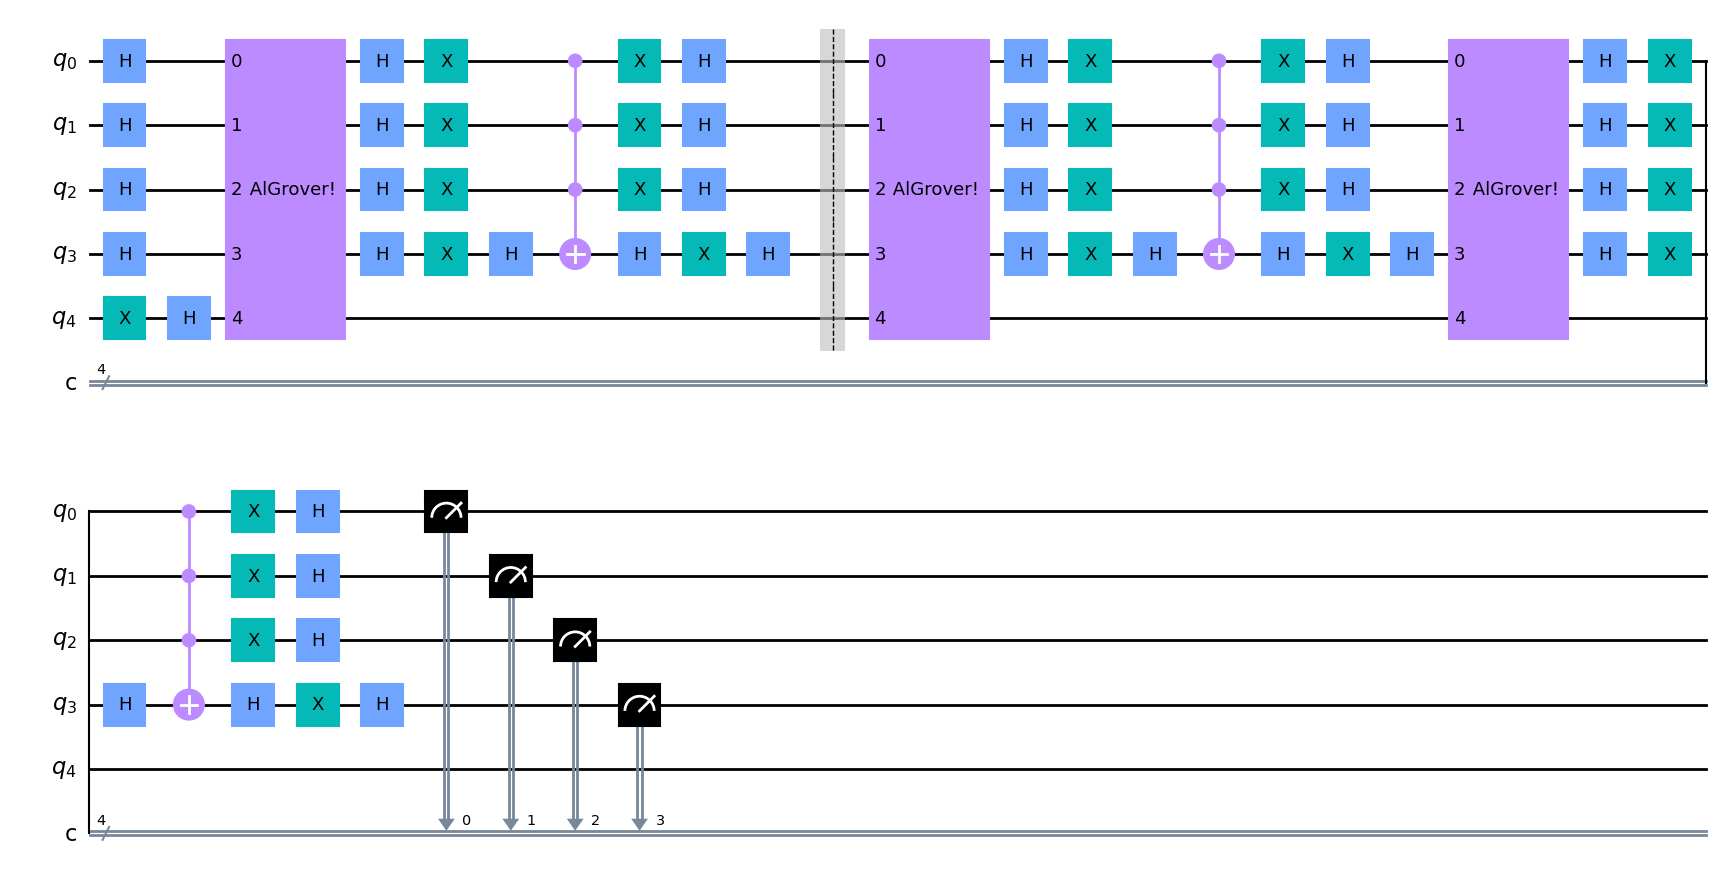

In [327]:
c2 = QuantumCircuit(5, 4)
c2.x(4)
c2.h(range(5))
c2.append(orac, range(5))
c2.h(range(4))
c2.x([0, 1, 2, 3])
c2.h(3)
c2.mct([0,1,2],3)
c2.h(3)

c2.x([0, 1, 2, 3])
c2.h(range(4))
c2.barrier()
c2.append(orac, range(5))
c2.h(range(4))
c2.x([0, 1, 2, 3])
c2.h(3)
c2.mct([0,1,2],3)
c2.h(3)

c2.x([0, 1, 2, 3])
c2.h(range(4))

c2.append(orac, range(5))
c2.h(range(4))
c2.x([0, 1, 2, 3])
c2.h(3)
c2.mct([0,1,2],3)
c2.h(3)

c2.x([0, 1, 2, 3])
c2.h(range(4))
c2.measure(range(4), range(4))
c2.draw(output='mpl')

In [328]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [329]:
simulador = Aer.get_backend('qasm_simulator')

In [330]:
ejecucion = execute(c2, backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

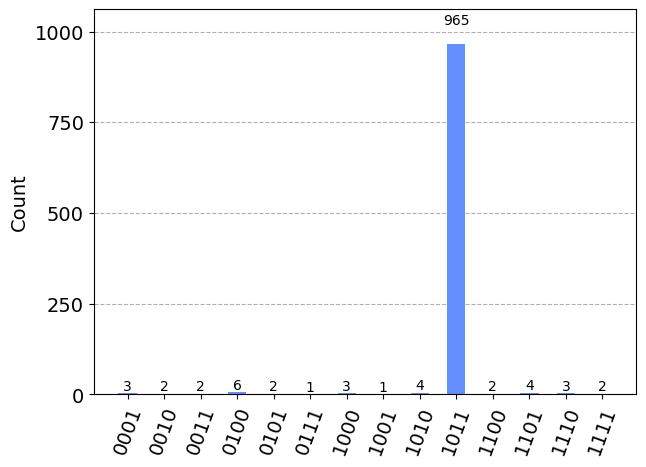

In [331]:
plot_histogram(conteos)

<p style="background-color:black; color:white; padding:28px"> Podemos mirar que aún con 3 iteraciones el resultado es aun más alta la posibilidad de obtener la cadena ganadora $|1101\rangle$<span style="font-size:30px"> 🏆</span> </p> 

<p style="background-color:lightgreen; color:greenblack; padding:35px">Ahora probararemos con una funcion $f:\{0, 1\}^5 \longrightarrow \{0, 1\}$ donde habran dos cadenas ganadoras<span style="font-size:30px"> 🏆</span> </p>  

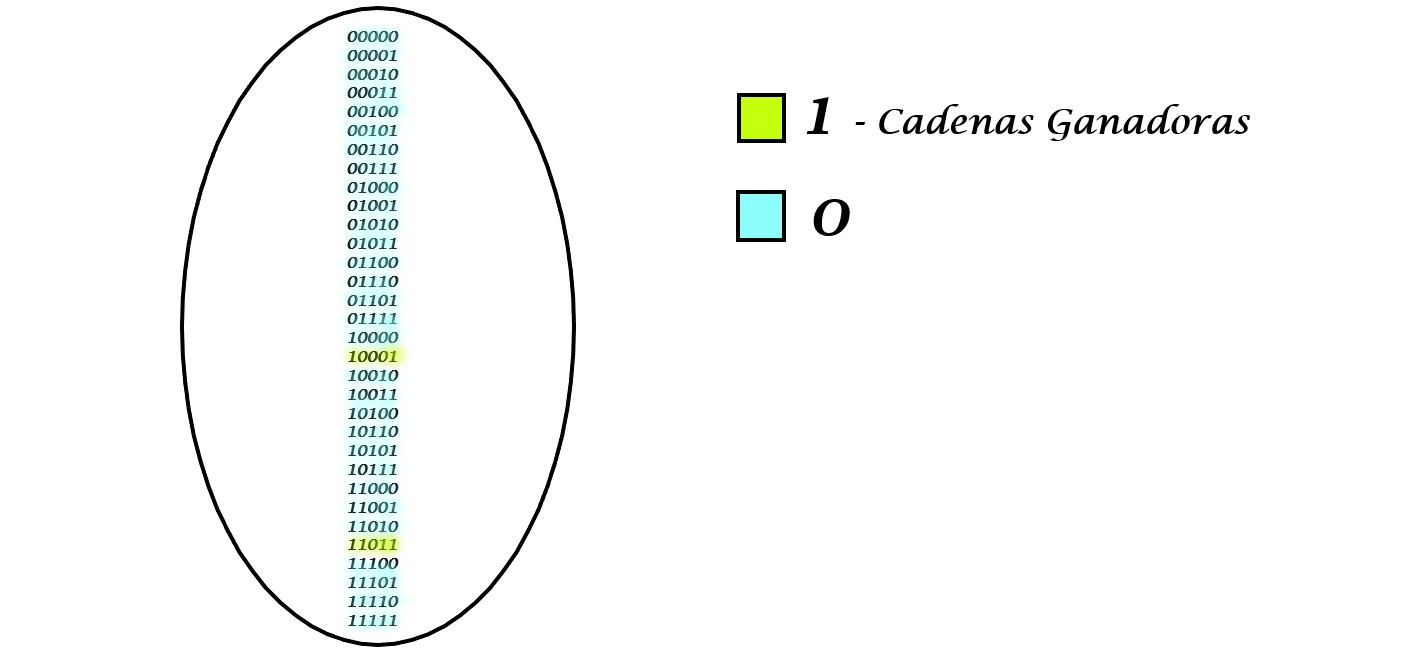

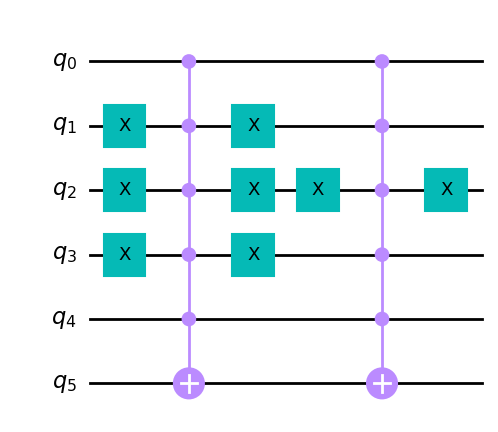

In [332]:
gm = QuantumCircuit (6)

gm.x(1)
gm.x(2)
gm.x(3)
gm.mct([0,1,2,3,4],5)
gm.x(1)
gm.x(2)
gm.x(3)


gm.x(2)
gm.mct([0,1,2,3,4],5)
gm.x(2)


gm.draw(output = 'mpl')

In [333]:
from qiskit import QuantumCircuit, transpile 

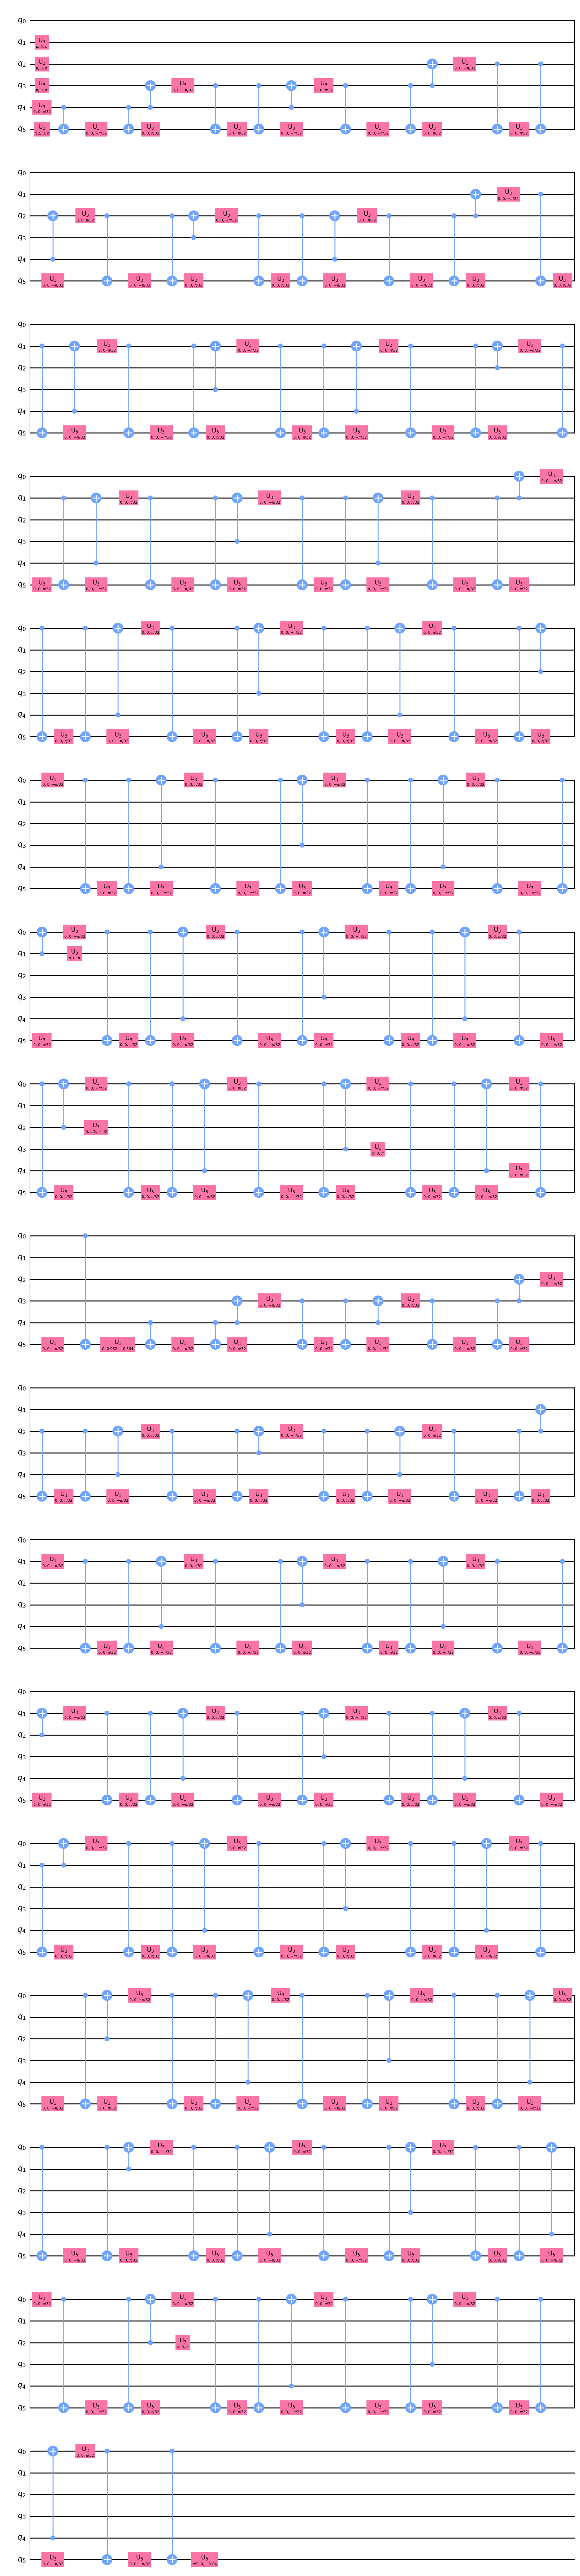

In [334]:
result= transpile(gm, basis_gates=['u3','cx'])
result.draw(output='mpl')

In [335]:
result.count_ops()

OrderedDict([('u3', 194), ('cx', 184)])

In [336]:
costo = result.count_ops()['u3'] + 10*result.count_ops()['cx']
print(costo)

2034


In [337]:
orac2 = gm.to_gate()
orac2.name = 'vamos!'

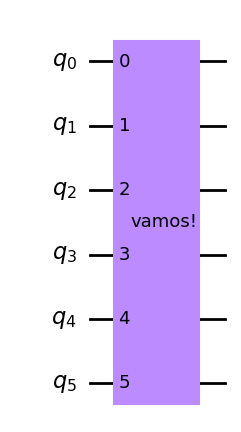

In [338]:
q = QuantumCircuit(6)
q.append(orac2, [0, 1, 2, 3, 4, 5])
q.draw(output='mpl')

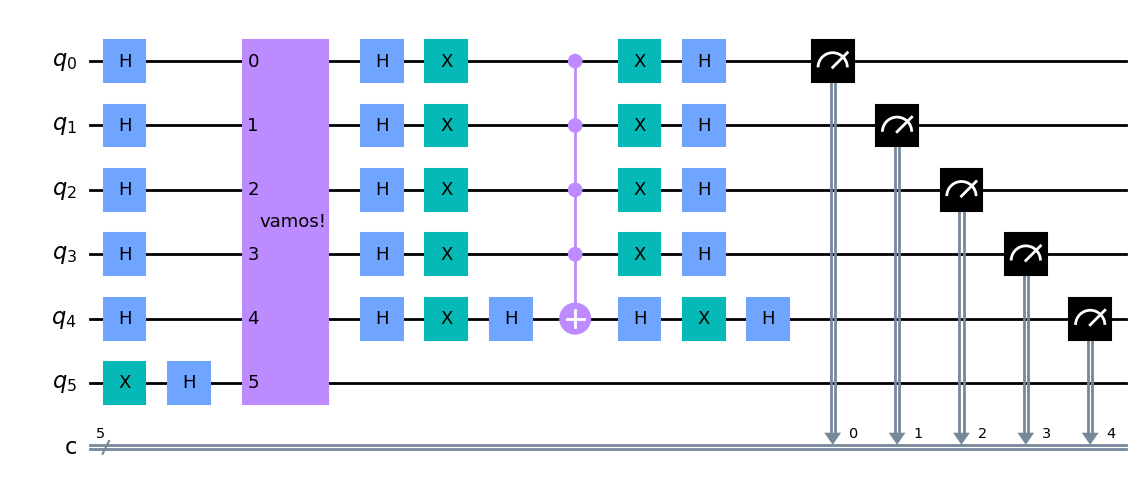

In [339]:
al = QuantumCircuit(6, 5)
al.x(5)

al.h(range(6))
al.append(orac2, range(6))
al.h(range(5))
al.x([0, 1, 2, 3,4])
al.h(4)
al.mct([0,1,2,3],4)
al.h(4)

al.x([0, 1, 2, 3,4])
al.h(range(5))
al.measure(range(5), range(5))
al.draw(output='mpl')

In [340]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(al,backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

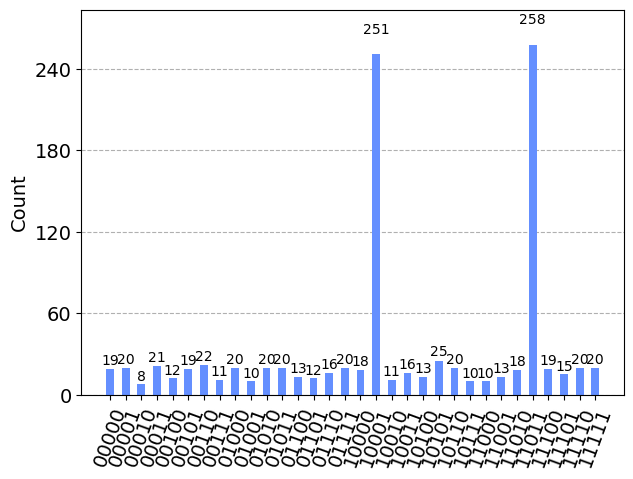

In [341]:
plot_histogram(conteos)

<p style="background-color:lightgreen; color:greenblack; padding:20px"> Podemos ver que al hacer una iteracion en el  oraculo de grover nos dan las cadenas ganadoras que habiamos definido con una probalidad de 235 y 227  <span style="font-size:30px"> 🏆</span> </p>

<p style="background-color:lightcyan; color:blue; padding:20px"> Ahora probaremos la probabilidad con 2 iteraciones  </p> 

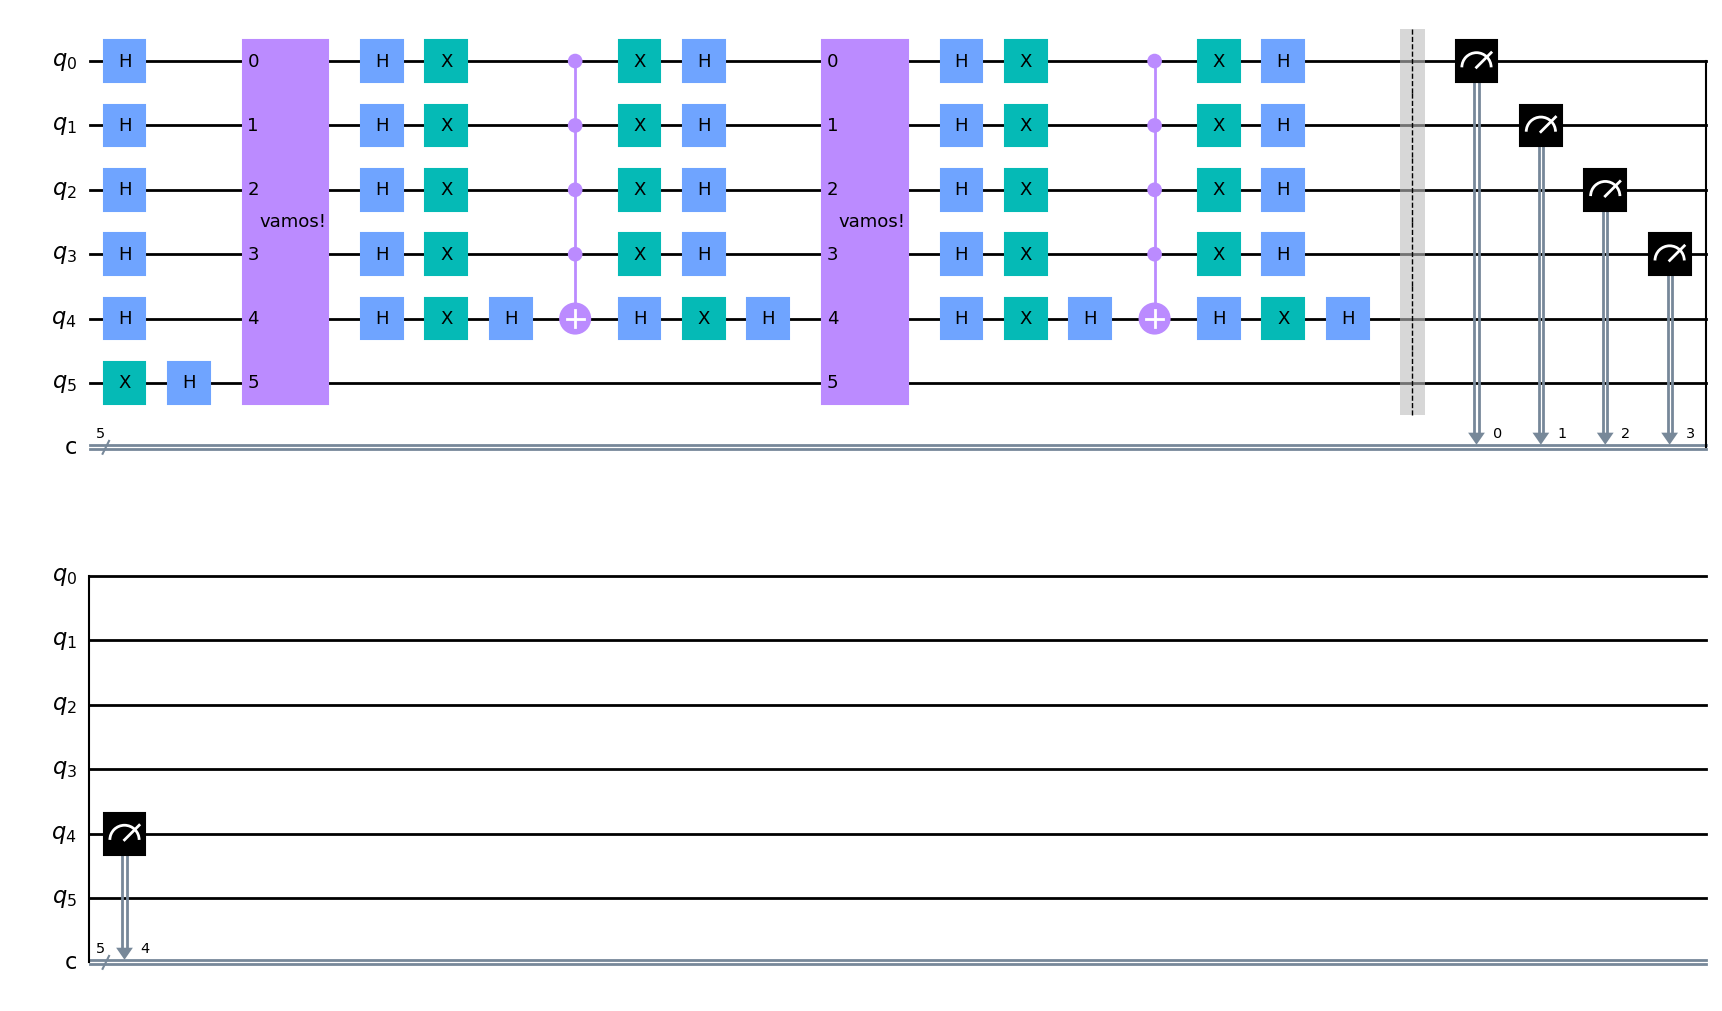

In [342]:
al1 = QuantumCircuit(6, 5)
al1.x(5)

al1.h(range(6))
al1.append(orac2, range(6))
al1.h(range(5))
al1.x([0, 1, 2, 3,4])
al1.h(4)
al1.mct([0,1,2,3],4)
al1.h(4)

al1.x([0, 1, 2, 3,4])
al1.h(range(5))
al1.append(orac2, range(6))
al1.h(range(5))
al1.x([0, 1, 2, 3,4])
al1.h(4)
al1.mct([0,1,2,3],4)
al1.h(4)
al1.x([0, 1, 2, 3,4])
al1.h(range(5))
al1.barrier()
al1.measure(range(5), range(5))
al1.draw(output='mpl')

In [343]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [344]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(al1, backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

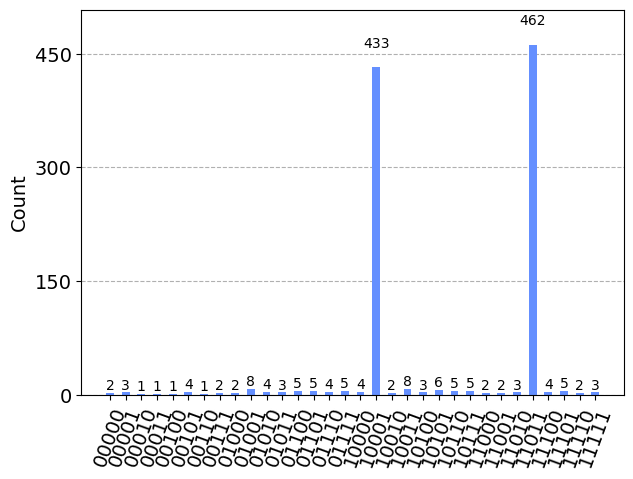

In [345]:
plot_histogram(conteos)

<p style="background-color:black; color:white; padding:28px"> Podemos mirar que aún con dos iteraciones obtenemos las cadenas ganadoras $|10001\rangle$ y $|11011\rangle$<span style="font-size:30px"> 🏆</span> </p

<p style="background-color:lightcyan; color:greenblack; padding:10px"> Ahora probaremos la probabilidad con 3 iteraciones  </p> 

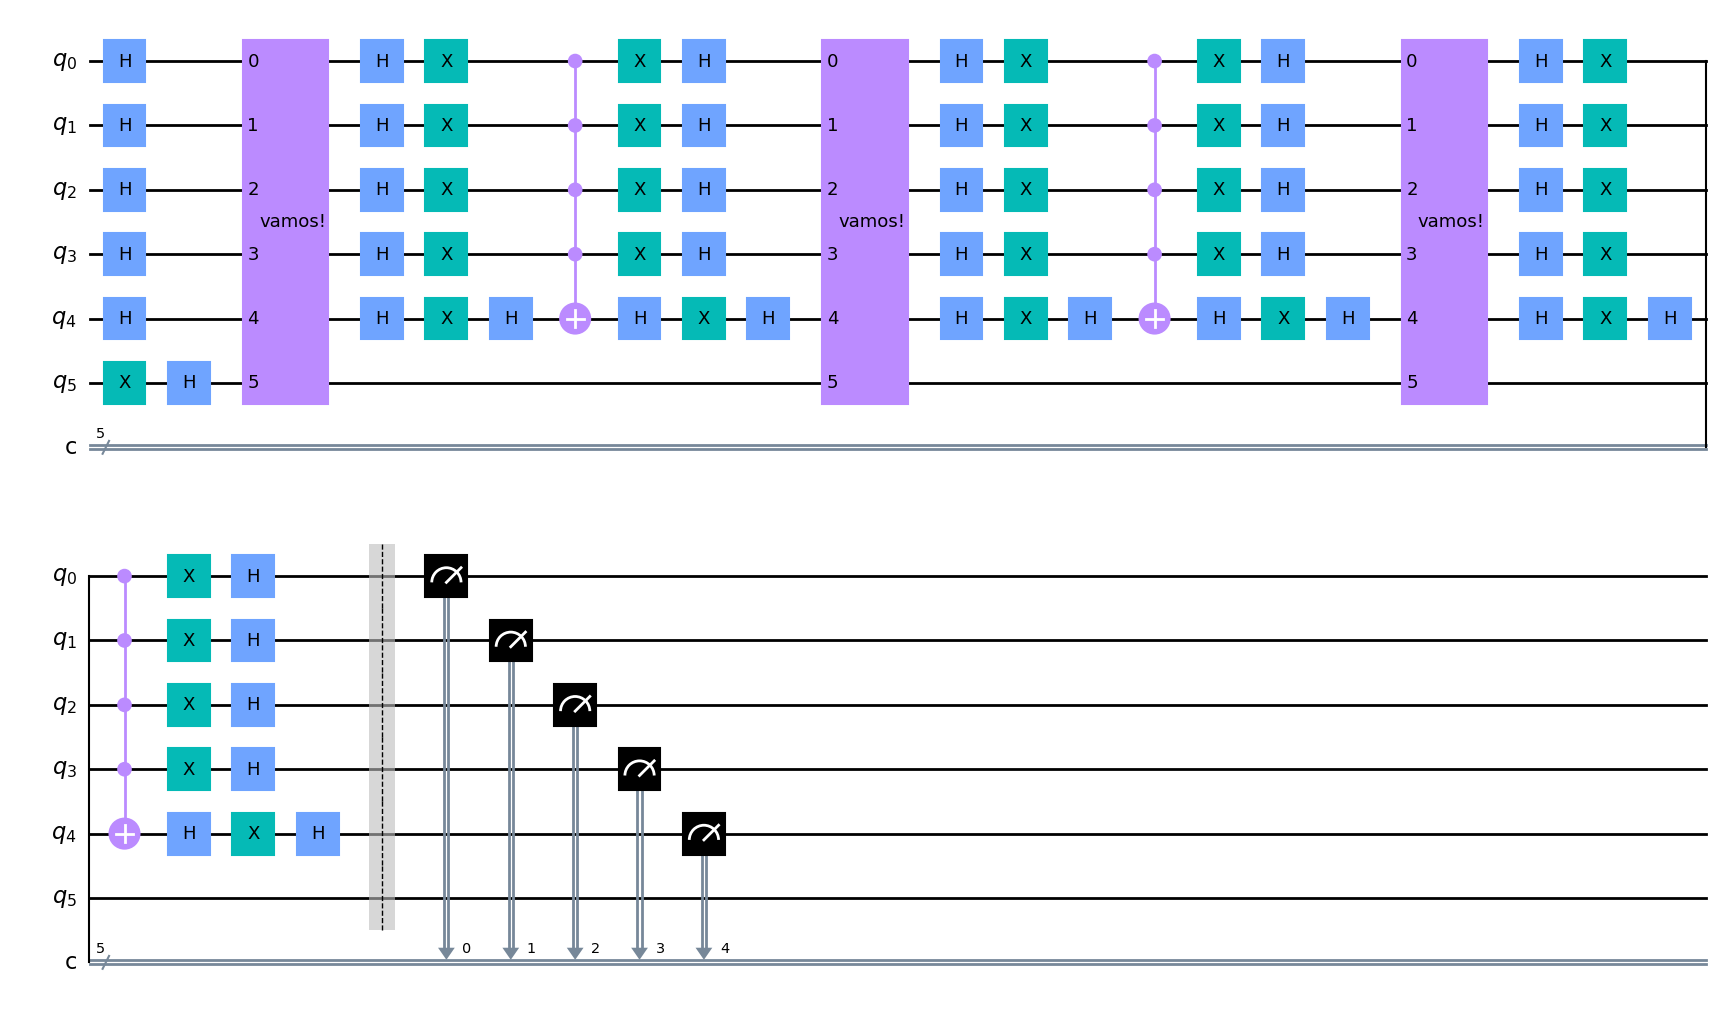

In [346]:
al2 = QuantumCircuit(6, 5)
al2.x(5)

al2.h(range(6))
al2.append(orac2, range(6))
al2.h(range(5))
al2.x([0, 1, 2, 3,4])
al2.h(4)
al2.mct([0,1,2,3],4)
al2.h(4)

al2.x([0, 1, 2, 3,4])
al2.h(range(5))
al2.append(orac2, range(6))
al2.h(range(5))
al2.x([0, 1, 2, 3,4])
al2.h(4)
al2.mct([0,1,2,3],4)
al2.h(4)
al2.x([0, 1, 2, 3,4])
al2.h(range(5))
al2.append(orac2, range(6))
al2.h(range(5))
al2.x([0, 1, 2, 3,4])
al2.h(4)
al2.mct([0,1,2,3],4)
al2.h(4)
al2.x([0, 1, 2, 3,4])
al2.h(range(5))
al2.barrier()
al2.measure(range(5), range(5))
al2.draw(output='mpl')

In [347]:
imulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(al2, backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

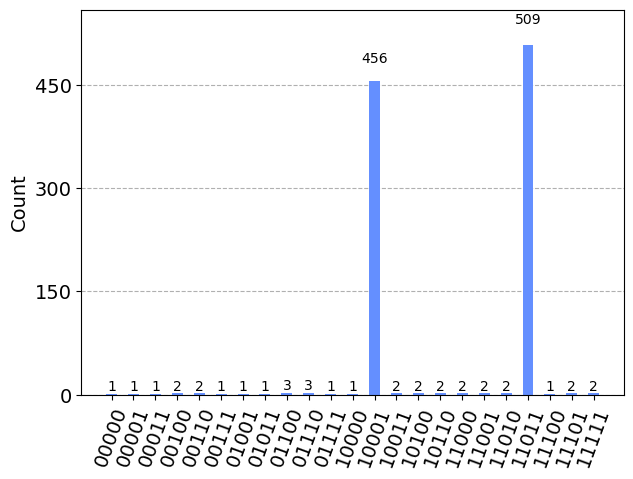

In [348]:
plot_histogram(conteos)

<p style="background-color:black; color:white; padding:25px"> Podemos mirar que aún con 3 iteraciones  es aun más alta la posibilidad de obtener las cadenas ganadoras $|10001\rangle$ y $|11011\rangle$<span style="font-size:30px"> 🏆</span> </p> 

<p style="background-color:lightgreen; color:greenblack; padding:35px">Ahora probararemos con una funcion $f:\{0, 1\}^5 \longrightarrow \{0, 1\}$ donde habra el 25 % de cadenas ganadoras<span style="font-size:20px"> 🏆</span> </p>  

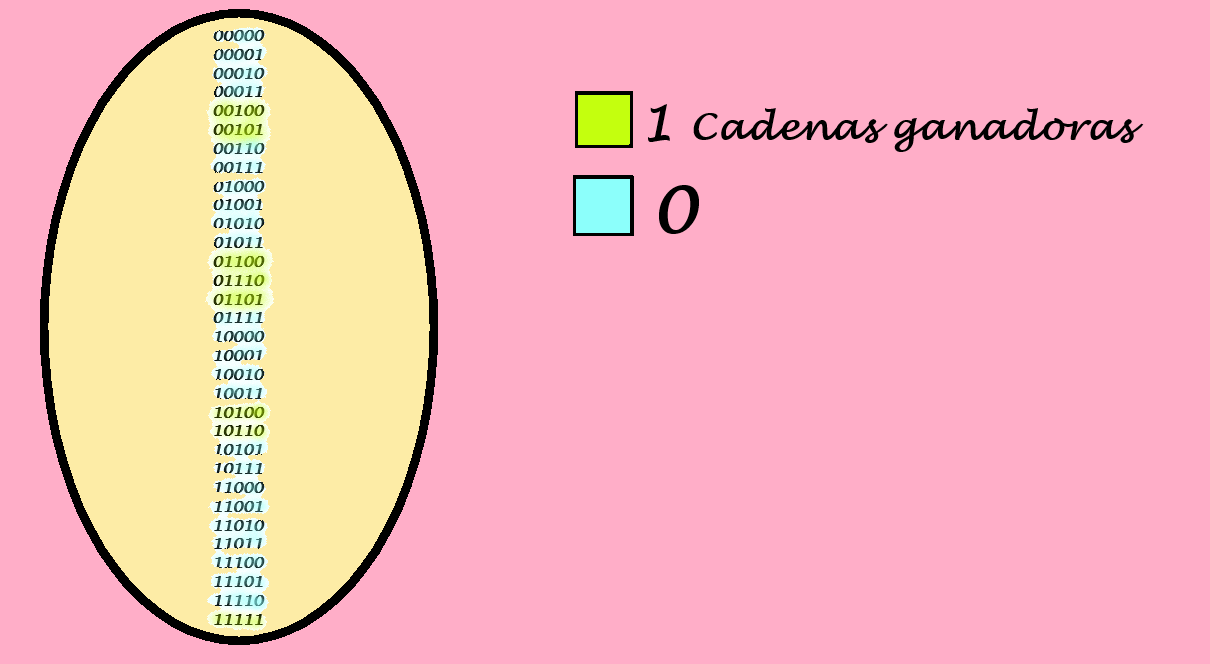

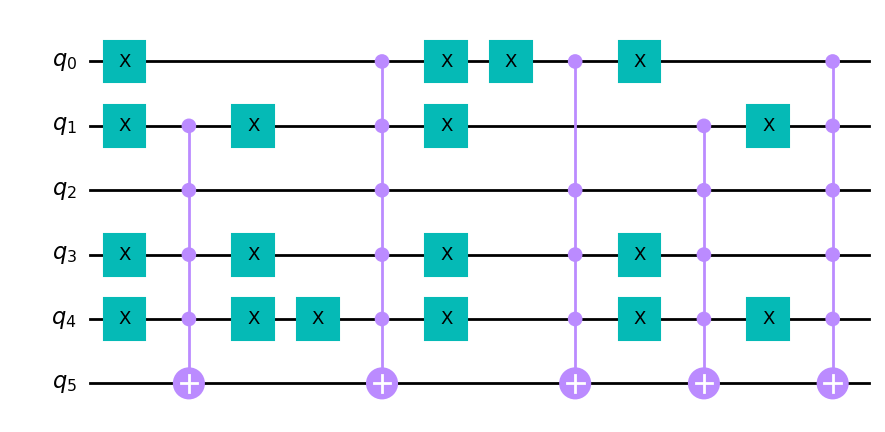

In [136]:
gm1 = QuantumCircuit (6)
gm1.x(1)
gm1.x(3)
gm1.x(4)
gm1.mct([1,2,3,4],5)
gm1.x(1)
gm1.x(3)
gm1.x(4)

gm1.x(0)
gm1.x(4)
gm1.mct([0,1,2,3,4],5)
gm1.x(0)
gm1.x(4)

gm1.x(0)
gm1.x(3)
gm1.mct([0,2,3,4],5)
gm1.x(0)
gm1.x(3)

gm1.x(1)
gm1.x(4)
gm1.mct([1,2,3,4],5)
gm1.x(1)
gm1.x(4)


gm1.mct([0,1,2,3,4],5)



gm1.draw(output = 'mpl')

In [137]:
from qiskit import QuantumCircuit, transpile 

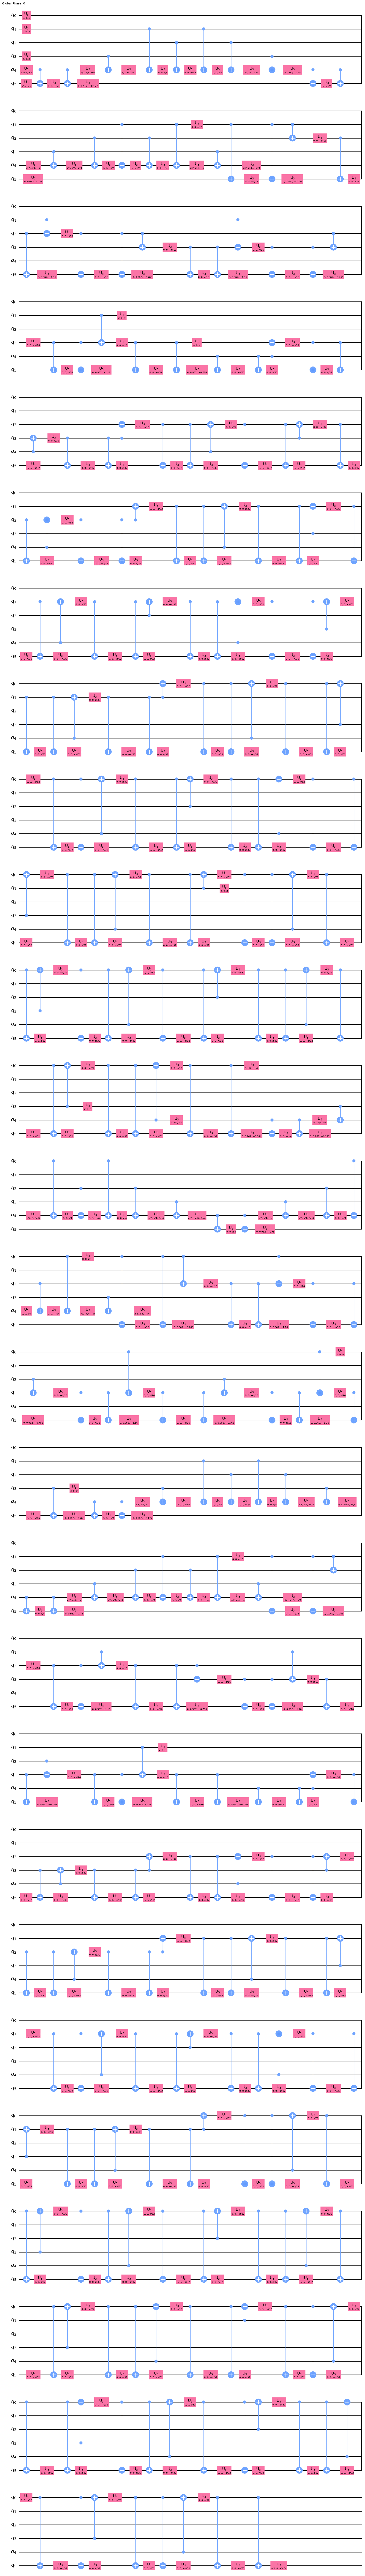

In [138]:
result= transpile(gm1, basis_gates=['u3','cx'])
result.draw(output='mpl')

In [139]:
result.count_ops()

OrderedDict([('u3', 315), ('cx', 292)])

In [140]:
costo = result.count_ops()['u3'] + 10*result.count_ops()['cx']
print(costo)

3235


In [141]:
orac3 = gm1.to_gate()
orac3.name = 'Andale'

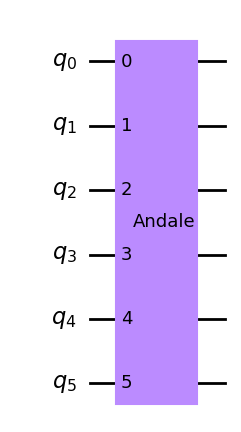

In [142]:
q = QuantumCircuit(6)
q.append(orac3, [0, 1, 2, 3, 4, 5])
q.draw(output='mpl')

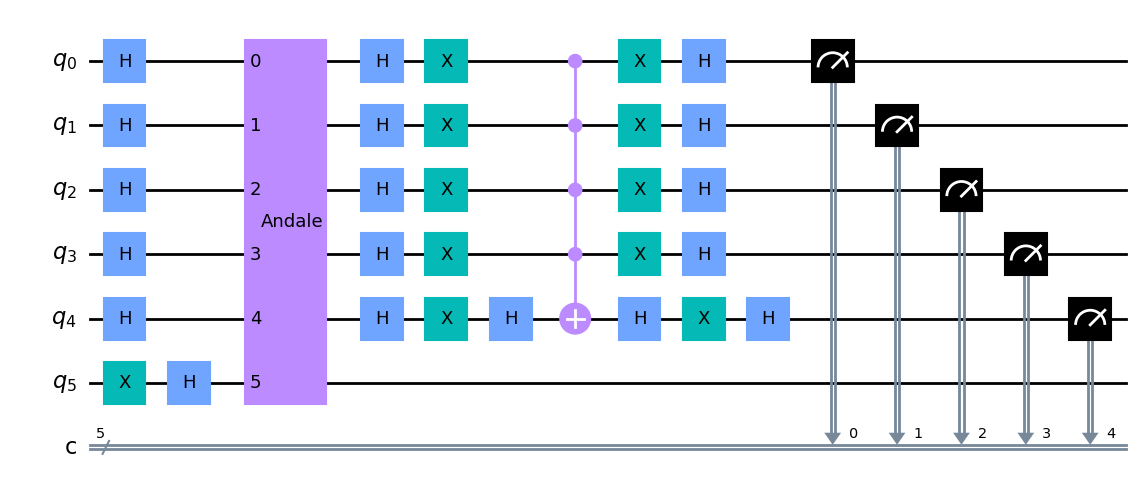

In [143]:
gm1 = QuantumCircuit(6, 5)
gm1.x(5)

gm1.h(range(6))
gm1.append(orac3, range(6))
gm1.h(range(5))
gm1.x([0, 1, 2, 3,4])
gm1.h(4)
gm1.mct([0,1,2,3],4)
gm1.h(4)

gm1.x([0, 1, 2, 3,4])
gm1.h(range(5))
gm1.measure(range(5), range(5))
gm1.draw(output='mpl')

In [144]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(gm1,backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

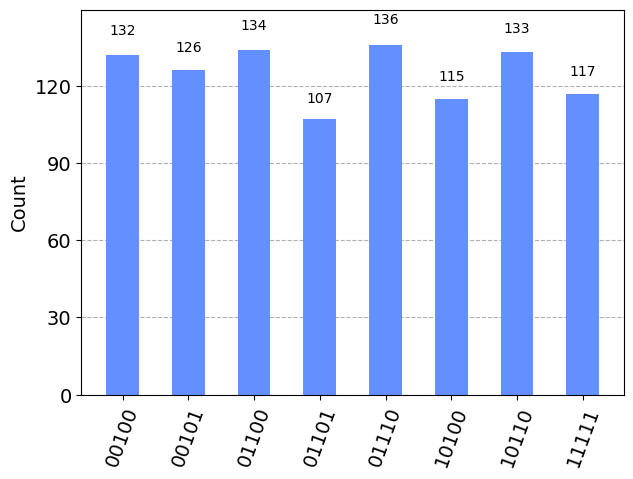

In [145]:
plot_histogram(conteos)

<p style="background-color:lightgreen; color:greenblack; padding:20px"> Podemos ver, que al hacer una iteracion en el  oraculo de grover nos da como resultado del 25% de cadenas ganadoras de una funcion $f:\{0, 1\}^5 \longrightarrow \{0, 1\}$   <span style="font-size:30px"> 🏆</span> </p>

<p style="background-color:lightcyan; color:blue; padding:20px"> Ahora probaremos la probabilidad con 2 iteraciones  </p> 

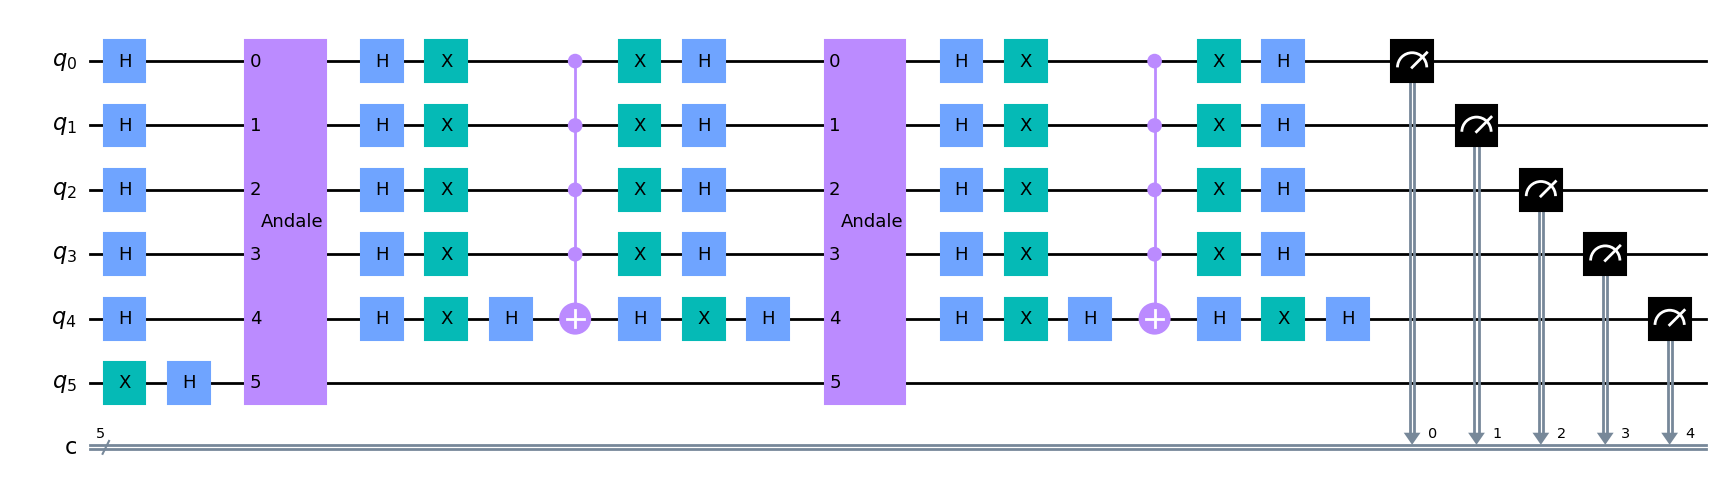

In [150]:
gm3 = QuantumCircuit(6, 5)
gm3.x(5)

gm3.h(range(6))
gm3.append(orac3, range(6))
gm3.h(range(5))
gm3.x([0, 1, 2, 3,4])
gm3.h(4)
gm3.mct([0,1,2,3],4)
gm3.h(4)
gm3.x([0, 1, 2, 3,4])
gm3.h(range(5))
gm3.append(orac3, range(6))
gm3.h(range(5))
gm3.x([0, 1, 2, 3,4])
gm3.h(4)
gm3.mct([0,1,2,3],4)
gm3.h(4)
gm3.x([0, 1, 2, 3,4])
gm3.h(range(5))
gm3.measure(range(5), range(5))
gm3.draw(output='mpl')

In [151]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(gm3, backend=simulador, shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()

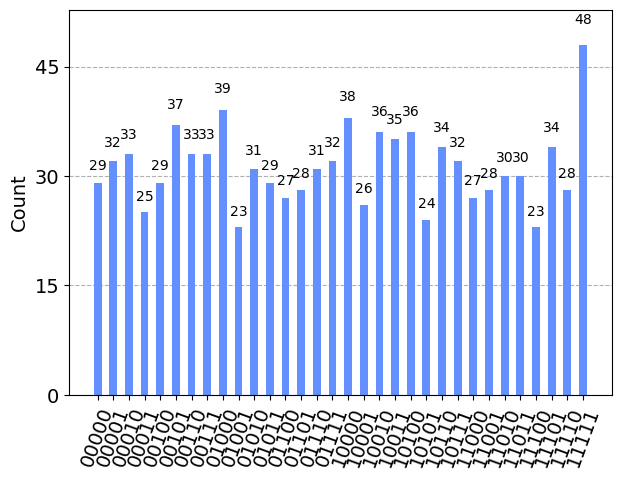

In [152]:
plot_histogram(conteos)

<p style="background-color:black; color:white; padding:25px"> Podemos mirar que con 2 iteraciones nuestro resultado cambia y obtenemos más del 25% de cadenas ganadoras y apenas estabamos buscando el 25% asi que ya no nos sirve.<span style="font-size:20px">😖☹️😥</span> </p>

## Referencias ##

<a id =division_ID >https://es.wikipedia.org/wiki/Algoritmo_de_Grover
    
    
   <a id =division_ID > https://web.archive.org/web/20140201230754/http://www.bell-labs.com/user/feature/archives/lkgrover/